IMPORTING PACKAGES

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
sns.set_style("whitegrid")
from sklearn import preprocessing
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

from pandas import datetime

import h5py

from matplotlib.font_manager import FontProperties
%matplotlib inline

READING DATA

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
store=pd.read_csv('stores.csv')
feature=pd.read_csv('features.csv')

# EXPLORING DATA

EXPLORING stores.csv

In [3]:
print(store.head().append(store.tail()),"\n")
print("Structure of Store:\n",store.shape, "\n")
print("Number of missing values:\n",store.isnull().sum().sort_values(ascending=False),"\n")

    Store Type    Size
0       1    A  151315
1       2    A  202307
2       3    B   37392
3       4    A  205863
4       5    B   34875
40     41    A  196321
41     42    C   39690
42     43    C   41062
43     44    C   39910
44     45    B  118221 

Structure of Store:
 (45, 3) 

Number of missing values:
 Size     0
Type     0
Store    0
dtype: int64 



EXPLORING features.csv 

In [4]:
print(feature.head().append(feature.tail()),"\n")
print("Structure of Feature: ",feature.shape,"\n")
print("Summary Statistic:\n",feature.describe(),"\n")
print("Number of missing values:\n",feature.isnull().sum().sort_values(ascending=False),"\n")

      Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0         1  05-02-2010        42.31       2.572        NaN        NaN   
1         1  12-02-2010        38.51       2.548        NaN        NaN   
2         1  19-02-2010        39.93       2.514        NaN        NaN   
3         1  26-02-2010        46.63       2.561        NaN        NaN   
4         1  05-03-2010        46.50       2.625        NaN        NaN   
8185     45  28-06-2013        76.05       3.639    4842.29     975.03   
8186     45  05-07-2013        77.50       3.614    9090.48    2268.58   
8187     45  12-07-2013        79.37       3.614    3789.94    1827.31   
8188     45  19-07-2013        82.84       3.737    2961.49    1047.07   
8189     45  26-07-2013        76.06       3.804     212.02     851.73   

      MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0           NaN        NaN        NaN  211.096358         8.106      False  
1           NaN        NaN     

FINDING OUT THE MISSING PERCENTAGE OF DATA ACROSS EACH FEATURE

In [5]:
feature_percent_missing = feature.isnull().sum()*100/len(feature)
feature_data_type = feature.dtypes

feature_summary = pd.DataFrame({"Percent_missing": feature_percent_missing.round(2), 
                               "Datatypes": feature_data_type})

feature_summary

,Percent_missing,Datatypes
Store,0.00,int64
Date,0.00,object
Temperature,0.00,float64
Fuel_Price,0.00,float64
MarkDown1,50.77,float64
MarkDown2,64.33,float64
MarkDown3,55.89,float64
MarkDown4,57.70,float64
MarkDown5,50.55,float64
CPI,7.14,float64


EXPLORING train.csv

In [6]:
print(train.head().append(train.tail()),"\n")
print("Structure of train:\n",train.shape,"\n")
print("Summary Statistic:\n",train.describe(),"\n")
print("Number of missing values:\n",train.isnull().sum().sort_values(ascending=False),"\n")

        Store  Dept        Date  Weekly_Sales  IsHoliday
0           1     1  05-02-2010      24924.50      False
1           1     1  12-02-2010      46039.49       True
2           1     1  19-02-2010      41595.55      False
3           1     1  26-02-2010      19403.54      False
4           1     1  05-03-2010      21827.90      False
421565     45    98  28-09-2012        508.37      False
421566     45    98  05-10-2012        628.10      False
421567     45    98  12-10-2012       1061.02      False
421568     45    98  19-10-2012        760.01      False
421569     45    98  26-10-2012       1076.80      False 

Structure of train:
 (421570, 5) 

Summary Statistic:
                Store           Dept   Weekly_Sales
count  421570.000000  421570.000000  421570.000000
mean       22.200546      44.260317   15981.258123
std        12.785297      30.492054   22711.183519
min         1.000000       1.000000   -4988.940000
25%        11.000000      18.000000    2079.650000
50%       

EXPLORING test.csv

In [7]:
print(test.head().append(test.tail()),"\n")
print("Structure of test:\n",test.shape,"\n")
print("Summary Statistic:\n",test.describe(),"\n")
print("Number of missing values:\n",test.isnull().sum().sort_values(ascending=False),"\n")

        Store  Dept        Date  IsHoliday
0           1     1  02-11-2012      False
1           1     1  09-11-2012      False
2           1     1  16-11-2012      False
3           1     1  23-11-2012       True
4           1     1  30-11-2012      False
115059     45    98  28-06-2013      False
115060     45    98  05-07-2013      False
115061     45    98  12-07-2013      False
115062     45    98  19-07-2013      False
115063     45    98  26-07-2013      False 

Structure of test:
 (115064, 4) 

Summary Statistic:
                Store           Dept
count  115064.000000  115064.000000
mean       22.238207      44.339524
std        12.809930      30.656410
min         1.000000       1.000000
25%        11.000000      18.000000
50%        22.000000      37.000000
75%        33.000000      74.000000
max        45.000000      99.000000 

Number of missing values:
 IsHoliday    0
Date         0
Dept         0
Store        0
dtype: int64 



# JOINING TABLES

In [8]:
combined_train = pd.merge(train, store, how="left", on="Store")
combined_test = pd.merge(test, store, how="left", on="Store")
print(combined_train.head(),"\n", combined_train.shape,"\n")
print(combined_test.head(),"\n", combined_test.shape,"\n")

   Store  Dept        Date  Weekly_Sales  IsHoliday Type    Size
0      1     1  05-02-2010      24924.50      False    A  151315
1      1     1  12-02-2010      46039.49       True    A  151315
2      1     1  19-02-2010      41595.55      False    A  151315
3      1     1  26-02-2010      19403.54      False    A  151315
4      1     1  05-03-2010      21827.90      False    A  151315 
 (421570, 7) 

   Store  Dept        Date  IsHoliday Type    Size
0      1     1  02-11-2012      False    A  151315
1      1     1  09-11-2012      False    A  151315
2      1     1  16-11-2012      False    A  151315
3      1     1  23-11-2012       True    A  151315
4      1     1  30-11-2012      False    A  151315 
 (115064, 6) 



In [9]:
combined_train = pd.merge(combined_train, feature, how = "inner", on=["Store","Date"])
combined_test = pd.merge(combined_test, feature, how = "inner", on=["Store","Date"])
print(combined_train.head())
print(combined_test.head())

   Store  Dept        Date  Weekly_Sales  IsHoliday_x Type    Size  \
0      1     1  05-02-2010      24924.50        False    A  151315   
1      1     2  05-02-2010      50605.27        False    A  151315   
2      1     3  05-02-2010      13740.12        False    A  151315   
3      1     4  05-02-2010      39954.04        False    A  151315   
4      1     5  05-02-2010      32229.38        False    A  151315   

   Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
0        42.31       2.572        NaN        NaN        NaN        NaN   
1        42.31       2.572        NaN        NaN        NaN        NaN   
2        42.31       2.572        NaN        NaN        NaN        NaN   
3        42.31       2.572        NaN        NaN        NaN        NaN   
4        42.31       2.572        NaN        NaN        NaN        NaN   

   MarkDown5         CPI  Unemployment  IsHoliday_y  
0        NaN  211.096358         8.106        False  
1        NaN  211.096358  

DROPING THE EXTRA IsHoliday_y FROM BOTH THE COMBINED DATASETS

In [10]:
combined_train = combined_train.drop(["IsHoliday_y"], axis=1)
combined_test = combined_test.drop(["IsHoliday_y"], axis=1)
print(combined_train.head())
print(combined_test.head())

   Store  Dept        Date  Weekly_Sales  IsHoliday_x Type    Size  \
0      1     1  05-02-2010      24924.50        False    A  151315   
1      1     2  05-02-2010      50605.27        False    A  151315   
2      1     3  05-02-2010      13740.12        False    A  151315   
3      1     4  05-02-2010      39954.04        False    A  151315   
4      1     5  05-02-2010      32229.38        False    A  151315   

   Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
0        42.31       2.572        NaN        NaN        NaN        NaN   
1        42.31       2.572        NaN        NaN        NaN        NaN   
2        42.31       2.572        NaN        NaN        NaN        NaN   
3        42.31       2.572        NaN        NaN        NaN        NaN   
4        42.31       2.572        NaN        NaN        NaN        NaN   

   MarkDown5         CPI  Unemployment  
0        NaN  211.096358         8.106  
1        NaN  211.096358         8.106  
2        Na

In [11]:
combined_train.describe()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,136727.915739,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289
std,12.785297,30.492054,22711.183519,60980.583328,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296
min,1.000000,1.000000,-4988.940000,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000
25%,11.000000,18.000000,2079.650000,93638.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000
50%,22.000000,37.000000,7612.030000,140167.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000
75%,33.000000,74.000000,20205.852500,202505.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000
max,45.000000,99.000000,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000


In [12]:
combined_test.describe()

,Store,Dept,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000,114915.000000,86437.000000,105235.000000,102176.000000,115064.000000,76902.000000,76902.000000
mean,22.238207,44.339524,136497.688921,53.941804,3.581546,7689.216439,3734.051729,2403.088666,3356.219071,3922.681189,176.961347,6.868733
std,12.809930,30.656410,61106.926438,18.724153,0.239442,10698.760716,8323.495014,13767.939313,7570.501545,19445.150745,41.239967,1.583427
min,1.000000,1.000000,34875.000000,-7.290000,2.872000,-2781.450000,-35.740000,-179.260000,0.220000,-185.170000,131.236226,3.684000
25%,11.000000,18.000000,93638.000000,39.820000,3.431000,1966.460000,180.350000,15.100000,155.460000,1309.300000,138.402033,5.771000
50%,22.000000,37.000000,140167.000000,54.470000,3.606000,4842.290000,742.590000,78.260000,840.940000,2390.430000,192.304445,6.806000
75%,33.000000,74.000000,202505.000000,67.350000,3.766000,9439.140000,2735.670000,272.580000,3096.920000,4227.270000,223.244532,8.036000
max,45.000000,99.000000,219622.000000,101.950000,4.125000,103184.980000,71074.170000,149483.310000,65344.640000,771448.100000,228.976456,10.199000


# DATA PREPROCESSING

### REPLACING MISSING VALUES BY 0

CHECKING FOR THE TOTAL NUMBER OF MISSING VALUES IN combined_train AND combined_test AND THEN REPLACING THEM WITH 0

In [13]:
print(combined_test.isnull().sum())
print(combined_train.isnull().sum())

Store               0
Dept                0
Date                0
IsHoliday_x         0
Type                0
Size                0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
dtype: int64
Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64


In [14]:
processed_train = combined_train.fillna(0)
processed_test = combined_test.fillna(0)

### REPLACING NEGATIVE MARKDOWN EVENTS BY 0 IN processed_train AND processed_test

In [15]:
processed_train.loc[processed_train['Weekly_Sales'] < 0.0,'Weekly_Sales'] = 0.0
processed_train.loc[processed_train['MarkDown2'] < 0.0,'MarkDown2'] = 0.0
processed_train.loc[processed_train['MarkDown3'] < 0.0,'MarkDown3'] = 0.0
processed_train.describe()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.467250,136727.915739,60.090059,3.361027,2590.074819,880.070274,468.092929,1083.132268,1662.772385,171.201947,7.960289
std,12.785297,30.492054,22711.032446,60980.583328,18.447931,0.458515,6052.385934,5084.520381,5528.872994,3894.529945,4207.629321,39.159276,1.863296
min,1.000000,1.000000,0.000000,34875.000000,-2.060000,2.472000,0.000000,0.000000,0.000000,0.000000,0.000000,126.064000,3.879000
25%,11.000000,18.000000,2079.650000,93638.000000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000
50%,22.000000,37.000000,7612.030000,140167.000000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000
75%,33.000000,74.000000,20205.852500,202505.000000,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000
max,45.000000,99.000000,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000


In [16]:
processed_test.loc[processed_test['MarkDown1'] < 0.0,'MarkDown1'] = 0.0
processed_test.loc[processed_test['MarkDown2'] < 0.0,'MarkDown2'] = 0.0
processed_test.loc[processed_test['MarkDown3'] < 0.0,'MarkDown3'] = 0.0
processed_test.loc[processed_test['MarkDown5'] < 0.0,'MarkDown5'] = 0.0
processed_test.describe()

,Store,Dept,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000
mean,22.238207,44.339524,136497.688921,53.941804,3.581546,7681.106189,2805.085103,2198.021241,2980.298267,3922.806060,118.270541,4.590657
std,12.809930,30.656410,61106.926438,18.724153,0.239442,10693.903634,7392.542823,13183.852299,7212.030921,19445.125049,89.878361,3.483338
min,1.000000,1.000000,34875.000000,-7.290000,2.872000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,18.000000,93638.000000,39.820000,3.431000,1963.550000,0.000000,7.770000,70.370000,1309.300000,0.000000,0.000000
50%,22.000000,37.000000,140167.000000,54.470000,3.606000,4828.720000,316.880000,60.000000,600.580000,2390.430000,138.402033,5.771000
75%,33.000000,74.000000,202505.000000,67.350000,3.766000,9427.410000,1575.850000,244.200000,2627.850000,4227.270000,201.212230,7.293000
max,45.000000,99.000000,219622.000000,101.950000,4.125000,103184.980000,71074.170000,149483.310000,65344.640000,771448.100000,228.976456,10.199000


### PERFORMING ONE HOT ENCODING FOR CATEGORICAL DATA AND BOOLEAN DATA

In [17]:
print(processed_train.dtypes, processed_test.dtypes)

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday_x        bool
Type             object
Size              int64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
dtype: object Store             int64
Dept              int64
Date             object
IsHoliday_x        bool
Type             object
Size              int64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
dtype: object


In [18]:
cat_col = ['IsHoliday_x','Type']
for col in cat_col:
    lbl = preprocessing.LabelEncoder()
    lbl.fit(processed_train[col].values.astype('str'))
    processed_train[col] = lbl.transform(processed_train[col].values.astype('str'))
for col in cat_col:
    lbl = preprocessing.LabelEncoder()
    lbl.fit(processed_test[col].values.astype('str'))
    processed_test[col] = lbl.transform(processed_test[col].values.astype('str'))

In [19]:
processed_train.to_csv("Processed_data/processed_train.csv", index=False)
processed_test.to_csv("Processed_data/processed_test.csv", index=False)

In [20]:
processed_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,05-02-2010,24924.50,0,0,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
1,1,2,05-02-2010,50605.27,0,0,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
2,1,3,05-02-2010,13740.12,0,0,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
3,1,4,05-02-2010,39954.04,0,0,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
4,1,5,05-02-2010,32229.38,0,0,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106


REARRANGING THE RESPONSE COLUMN (Weekly_Sales)

In [21]:
processed_train = processed_train[['Store', 'Dept', 'Date', 'Unemployment', 'IsHoliday_x', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Weekly_Sales']]

In [22]:
processed_train.to_csv("Processed_data/processed_train.csv", index=False)

In [23]:
processed_train.head()

,Store,Dept,Date,Unemployment,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Weekly_Sales
0,1,1,05-02-2010,8.106,0,0,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,24924.50
1,1,2,05-02-2010,8.106,0,0,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,50605.27
2,1,3,05-02-2010,8.106,0,0,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,13740.12
3,1,4,05-02-2010,8.106,0,0,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,39954.04
4,1,5,05-02-2010,8.106,0,0,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,32229.38


# VISUALIZATION OF HISTORIC DATA

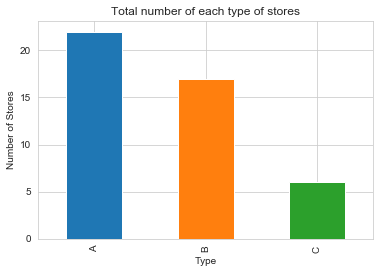

In [24]:
store['Type'].value_counts().plot(kind='bar')
plt.title('Total number of each type of stores')
plt.xlabel('Type')
plt.ylabel('Number of Stores')
plt.show()

Text(0.5, 0.98, 'Sizes of each type of store')

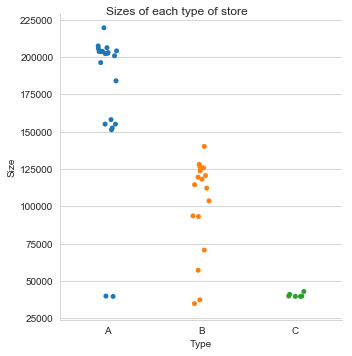

In [25]:
a=sns.catplot(x="Type", y="Size", data=store);
a.fig.suptitle('Sizes of each type of store')

In [26]:
a=train[['Store', 'Dept']].drop_duplicates()

Text(0.5, 1.0, 'Departments across every store')

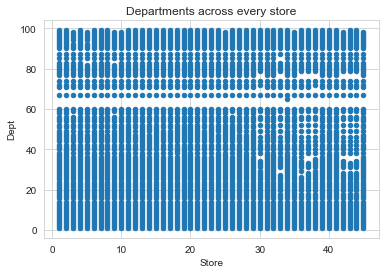

In [27]:
a.plot(kind='scatter', x='Store',y='Dept')
plt.title('Departments across every store')

Text(0.5, 1.0, 'Weekly Sales for stores of every size')

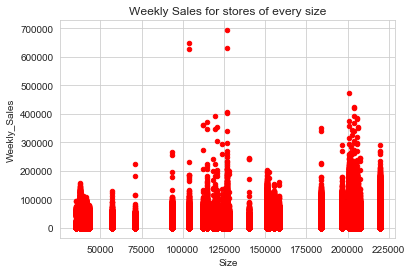

In [28]:
a=processed_train[['Weekly_Sales', 'Size']].drop_duplicates()
a.plot(kind='scatter', x='Size',y='Weekly_Sales',color='red')
plt.title('Weekly Sales for stores of every size')

Text(0.5, 0.98, 'Weekly Sales for stores of every type')

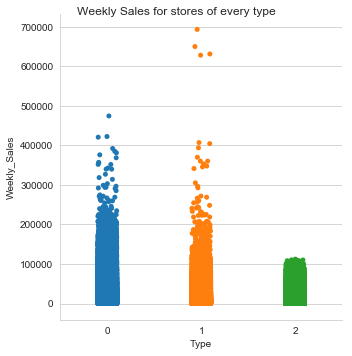

In [29]:
a=sns.catplot(x="Type", y="Weekly_Sales", data=processed_train);
a.fig.suptitle('Weekly Sales for stores of every type')

Text(0.5, 0.98, 'Weekly Sales on Holiday and Non-Holiday weeeks')

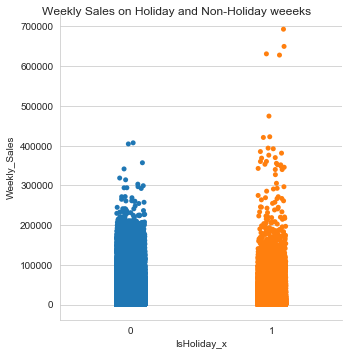

In [30]:
a=sns.catplot(x="IsHoliday_x", y="Weekly_Sales", data=processed_train);
a.fig.suptitle('Weekly Sales on Holiday and Non-Holiday weeeks')

Text(0.5, 0.98, 'Weekly Sales across every department')

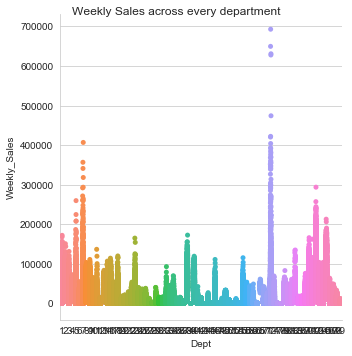

In [31]:
a=sns.catplot(x="Dept", y="Weekly_Sales", data=processed_train);
a.fig.suptitle('Weekly Sales across every department')

Text(0.5, 0.98, 'Weekly Sales across Fuel Price')

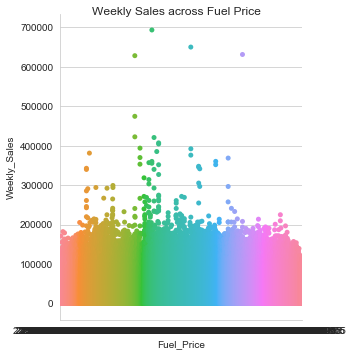

In [32]:
a=sns.catplot(x="Fuel_Price", y="Weekly_Sales", data=processed_train);
a.fig.suptitle('Weekly Sales across Fuel Price')

Text(0.5, 0.98, 'Weekly Sales across average temperature of the week')

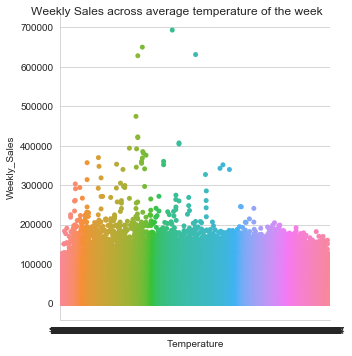

In [33]:
a=sns.catplot(x="Temperature", y="Weekly_Sales", data=processed_train);
a.fig.suptitle('Weekly Sales across average temperature of the week')

Text(0.5, 0.98, 'Weekly Sales across Consumer Price Index')

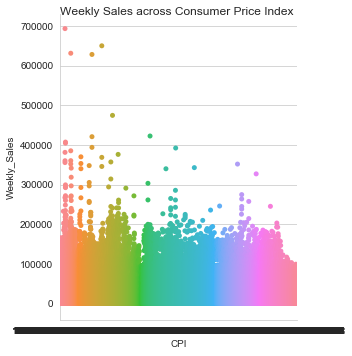

In [34]:
a=sns.catplot(x="CPI", y="Weekly_Sales", data=processed_train);
a.fig.suptitle('Weekly Sales across Consumer Price Index')

Text(0.5, 0.98, 'Weekly Sales across Unemployment Rates')

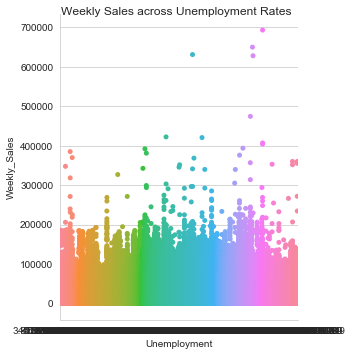

In [35]:
a=sns.catplot(x="Unemployment", y="Weekly_Sales", data=processed_train);
a.fig.suptitle('Weekly Sales across Unemployment Rates')

In [36]:
corr=processed_train.corr()

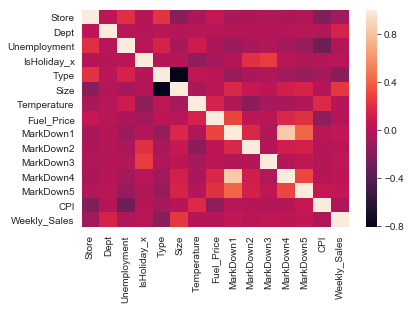

In [37]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [38]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,Store,Dept,Unemployment,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Weekly_Sales
Store,1,0.024,0.21,-0.00055,0.23,-0.18,-0.05,0.065,-0.06,-0.034,-0.02,-0.043,-0.012,-0.21,-0.085
Dept,0.024,1,0.0078,0.00092,0.0037,-0.003,0.0044,0.0036,0.0015,0.00059,0.0015,0.0019,0.0027,-0.0075,0.15
Unemployment,0.21,0.0078,1,0.01,0.15,-0.068,0.097,-0.034,-0.11,-0.041,-0.018,-0.077,-0.12,-0.3,-0.026
IsHoliday_x,-0.00055,0.00092,0.01,1,-0.0008,0.00059,-0.16,-0.078,-0.0035,0.21,0.27,0.012,-0.015,-0.0019,0.013
Type,0.23,0.0037,0.15,-0.0008,1,-0.81,0.043,0.03,-0.13,-0.055,-0.024,-0.09,-0.13,-0.066,-0.18
Size,-0.18,-0.003,-0.068,0.00059,-0.81,1,-0.058,0.0034,0.17,0.078,0.034,0.13,0.15,-0.0033,0.24
Temperature,-0.05,0.0044,0.097,-0.16,0.043,-0.058,1,0.14,-0.026,-0.18,-0.056,-0.05,-0.015,0.18,-0.0023
Fuel_Price,0.065,0.0036,-0.034,-0.078,0.03,0.0034,0.14,1,0.3,0.029,0.019,0.17,0.22,-0.16,-0.00012
MarkDown1,-0.06,0.0015,-0.11,-0.0035,-0.13,0.17,-0.026,0.3,1,0.17,-0.014,0.84,0.42,0.011,0.047
MarkDown2,-0.034,0.00059,-0.041,0.21,-0.055,0.078,-0.18,0.029,0.17,1,-0.0061,0.11,0.13,-0.0036,0.021


In [39]:
dfabc=processed_train[['Date','Store','Dept','IsHoliday_x','Unemployment','Fuel_Price','Temperature','Type','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Weekly_Sales']]

In [40]:
dfabc.head()

,Date,Store,Dept,IsHoliday_x,Unemployment,Fuel_Price,Temperature,Type,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Weekly_Sales
0,05-02-2010,1,1,0,8.106,2.572,42.31,0,0.0,0.0,0.0,0.0,0.0,211.096358,24924.50
1,05-02-2010,1,2,0,8.106,2.572,42.31,0,0.0,0.0,0.0,0.0,0.0,211.096358,50605.27
2,05-02-2010,1,3,0,8.106,2.572,42.31,0,0.0,0.0,0.0,0.0,0.0,211.096358,13740.12
3,05-02-2010,1,4,0,8.106,2.572,42.31,0,0.0,0.0,0.0,0.0,0.0,211.096358,39954.04
4,05-02-2010,1,5,0,8.106,2.572,42.31,0,0.0,0.0,0.0,0.0,0.0,211.096358,32229.38


In [41]:
dfabc["MarkDownValue"] = dfabc["MarkDown1"].add(dfabc["MarkDown2"])
dfabc["MarkDownValue"] = dfabc["MarkDownValue"].add(dfabc["MarkDown3"])
dfabc["MarkDownValue"] = dfabc["MarkDownValue"].add(dfabc["MarkDown4"])
dfabc["MarkDownValue"] = dfabc["MarkDownValue"].add(dfabc["MarkDown5"])
dfabc.head()

,Date,Store,Dept,IsHoliday_x,Unemployment,Fuel_Price,Temperature,Type,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Weekly_Sales,MarkDownValue
0,05-02-2010,1,1,0,8.106,2.572,42.31,0,0.0,0.0,0.0,0.0,0.0,211.096358,24924.50,0.0
1,05-02-2010,1,2,0,8.106,2.572,42.31,0,0.0,0.0,0.0,0.0,0.0,211.096358,50605.27,0.0
2,05-02-2010,1,3,0,8.106,2.572,42.31,0,0.0,0.0,0.0,0.0,0.0,211.096358,13740.12,0.0
3,05-02-2010,1,4,0,8.106,2.572,42.31,0,0.0,0.0,0.0,0.0,0.0,211.096358,39954.04,0.0
4,05-02-2010,1,5,0,8.106,2.572,42.31,0,0.0,0.0,0.0,0.0,0.0,211.096358,32229.38,0.0


In [42]:
dfabc = dfabc[dfabc.MarkDownValue != 0.0]

In [43]:
dfabc.head()
dfabc.shape

(151432, 16)

In [44]:
processed_test.head()

,Store,Dept,Date,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,02-11-2012,0,0,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
1,1,2,02-11-2012,0,0,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
2,1,3,02-11-2012,0,0,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
3,1,4,02-11-2012,0,0,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
4,1,5,02-11-2012,0,0,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573


In [45]:
processed_test.shape

(115064, 15)

In [46]:
dfdef=processed_test[['Store','Dept','IsHoliday_x','Type','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI']]

In [47]:
dfdef["MarkDownValue"] = dfdef["MarkDown1"].add(dfdef["MarkDown2"])
dfdef["MarkDownValue"] = dfdef["MarkDownValue"].add(dfdef["MarkDown3"])
dfdef["MarkDownValue"] = dfdef["MarkDownValue"].add(dfdef["MarkDown4"])
dfdef["MarkDownValue"] = dfdef["MarkDownValue"].add(dfdef["MarkDown5"])
dfdef.head()

C:\Users\varun\Anaconda 3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\varun\Anaconda 3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\varun\Anaconda 3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pand

,Store,Dept,IsHoliday_x,Type,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,MarkDownValue
0,1,1,0,0,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,18342.28
1,1,2,0,0,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,18342.28
2,1,3,0,0,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,18342.28
3,1,4,0,0,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,18342.28
4,1,5,0,0,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,18342.28


In [48]:
dfdef = dfdef[dfdef.MarkDownValue != 0.0]

In [49]:
dfdef.head()
dfdef.shape

(115064, 11)

In [50]:
dfx=dfabc
dfx=pd.get_dummies(dfx, columns=['Dept','Store','Type'])
dfx['Day']=dfx['Date'].str[0:2]
dfx['Month']=dfx['Date'].str[3:5]
dfx['Year']=dfx['Date'].str[6:10]
dfx.head()

,Date,IsHoliday_x,Unemployment,Fuel_Price,Temperature,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Store_42,Store_43,Store_44,Store_45,Type_0,Type_1,Type_2,Day,Month,Year
6587,11-11-2011,0,7.866,3.297,59.11,10382.9,6115.67,215.07,2406.62,6551.42,...,0,0,0,0,1,0,0,11,11,2011
6588,11-11-2011,0,7.866,3.297,59.11,10382.9,6115.67,215.07,2406.62,6551.42,...,0,0,0,0,1,0,0,11,11,2011
6589,11-11-2011,0,7.866,3.297,59.11,10382.9,6115.67,215.07,2406.62,6551.42,...,0,0,0,0,1,0,0,11,11,2011
6590,11-11-2011,0,7.866,3.297,59.11,10382.9,6115.67,215.07,2406.62,6551.42,...,0,0,0,0,1,0,0,11,11,2011
6591,11-11-2011,0,7.866,3.297,59.11,10382.9,6115.67,215.07,2406.62,6551.42,...,0,0,0,0,1,0,0,11,11,2011


In [51]:
dfx['Day']=pd.to_numeric(dfx['Day'])
dfx['Month']=pd.to_numeric(dfx['Month'])
dfx['Year']=pd.to_numeric(dfx['Year'])

In [52]:
dfx.dtypes

Date              object
IsHoliday_x        int64
Unemployment     float64
Fuel_Price       float64
Temperature      float64
MarkDown1        float64
MarkDown2        float64
MarkDown3        float64
MarkDown4        float64
MarkDown5        float64
CPI              float64
Weekly_Sales     float64
MarkDownValue    float64
Dept_1             uint8
Dept_2             uint8
Dept_3             uint8
Dept_4             uint8
Dept_5             uint8
Dept_6             uint8
Dept_7             uint8
Dept_8             uint8
Dept_9             uint8
Dept_10            uint8
Dept_11            uint8
Dept_12            uint8
Dept_13            uint8
Dept_14            uint8
Dept_16            uint8
Dept_17            uint8
Dept_18            uint8
                  ...   
Store_22           uint8
Store_23           uint8
Store_24           uint8
Store_25           uint8
Store_26           uint8
Store_27           uint8
Store_28           uint8
Store_29           uint8
Store_30           uint8


In [53]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
regressor = DecisionTreeRegressor(max_depth=32, random_state=0)
ptr=pd.get_dummies(processed_train, columns=['Dept','Store','Type'])
ptr['Day']=ptr['Date'].str[0:2]
ptr['Month']=ptr['Date'].str[3:5]
ptr['Year']=ptr['Date'].str[6:10]
ptr['Day']=pd.to_numeric(ptr['Day'])
ptr['Month']=pd.to_numeric(ptr['Month'])
ptr['Year']=pd.to_numeric(ptr['Year'])
ptr.head()

,Date,Unemployment,IsHoliday_x,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,Store_42,Store_43,Store_44,Store_45,Type_0,Type_1,Type_2,Day,Month,Year
0,05-02-2010,8.106,0,151315,42.31,2.572,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,5,2,2010
1,05-02-2010,8.106,0,151315,42.31,2.572,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,5,2,2010
2,05-02-2010,8.106,0,151315,42.31,2.572,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,5,2,2010
3,05-02-2010,8.106,0,151315,42.31,2.572,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,5,2,2010
4,05-02-2010,8.106,0,151315,42.31,2.572,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,5,2,2010


In [54]:
dfx.shape

(151432, 145)

In [55]:
ptr.shape

(421570, 145)

In [56]:
dfx.head()

,Date,IsHoliday_x,Unemployment,Fuel_Price,Temperature,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Store_42,Store_43,Store_44,Store_45,Type_0,Type_1,Type_2,Day,Month,Year
6587,11-11-2011,0,7.866,3.297,59.11,10382.9,6115.67,215.07,2406.62,6551.42,...,0,0,0,0,1,0,0,11,11,2011
6588,11-11-2011,0,7.866,3.297,59.11,10382.9,6115.67,215.07,2406.62,6551.42,...,0,0,0,0,1,0,0,11,11,2011
6589,11-11-2011,0,7.866,3.297,59.11,10382.9,6115.67,215.07,2406.62,6551.42,...,0,0,0,0,1,0,0,11,11,2011
6590,11-11-2011,0,7.866,3.297,59.11,10382.9,6115.67,215.07,2406.62,6551.42,...,0,0,0,0,1,0,0,11,11,2011
6591,11-11-2011,0,7.866,3.297,59.11,10382.9,6115.67,215.07,2406.62,6551.42,...,0,0,0,0,1,0,0,11,11,2011


In [57]:
x=dfx[[#'Unemployment',
 'IsHoliday_x',
 #'Size',
 #'Temperature',
 #'Fuel_Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 #'CPI',
 #'Weekly_Sales',
 'Dept_1',
 'Dept_2',
 'Dept_3',
 'Dept_4',
 'Dept_5',
 'Dept_6',
 'Dept_7',
 'Dept_8',
 'Dept_9',
 'Dept_10',
 'Dept_11',
 'Dept_12',
 'Dept_13',
 'Dept_14',
 'Dept_16',
 'Dept_17',
 'Dept_18',
 'Dept_19',
 'Dept_20',
 'Dept_21',
 'Dept_22',
 'Dept_23',
 'Dept_24',
 'Dept_25',
 'Dept_26',
 'Dept_27',
 'Dept_28',
 'Dept_29',
 'Dept_30',
 'Dept_31',
 'Dept_32',
 'Dept_33',
 'Dept_34',
 'Dept_35',
 'Dept_36',
 'Dept_37',
 'Dept_38',
 'Dept_39',
 'Dept_40',
 'Dept_41',
 'Dept_42',
 'Dept_43',
 'Dept_44',
 'Dept_45',
 'Dept_46',
 'Dept_47',
 'Dept_48',
 'Dept_49',
 'Dept_50',
 'Dept_51',
 'Dept_52',
 'Dept_54',
 'Dept_55',
 'Dept_56',
 'Dept_58',
 'Dept_59',
 'Dept_60',
 'Dept_65',
 'Dept_67',
 'Dept_71',
 'Dept_72',
 'Dept_74',
 'Dept_77',
 'Dept_78',
 'Dept_79',
 'Dept_80',
 'Dept_81',
 'Dept_82',
 'Dept_83',
 'Dept_85',
 'Dept_87',
 'Dept_90',
 'Dept_91',
 'Dept_92',
 'Dept_93',
 'Dept_94',
 'Dept_95',
 'Dept_96',
 'Dept_97',
 'Dept_98',
 'Dept_99',
 'Store_1',
 'Store_2',
 'Store_3',
 'Store_4',
 'Store_5',
 'Store_6',
 'Store_7',
 'Store_8',
 'Store_9',
 'Store_10',
 'Store_11',
 'Store_12',
 'Store_13',
 'Store_14',
 'Store_15',
 'Store_16',
 'Store_17',
 'Store_18',
 'Store_19',
 'Store_20',
 'Store_21',
 'Store_22',
 'Store_23',
 'Store_24',
 'Store_25',
 'Store_26',
 'Store_27',
 'Store_28',
 'Store_29',
 'Store_30',
 'Store_31',
 'Store_32',
 'Store_33',
 'Store_34',
 'Store_35',
 'Store_36',
 'Store_37',
 'Store_38',
 'Store_39',
 'Store_40',
 'Store_41',
 'Store_42',
 'Store_43',
 'Store_44',
 'Store_45',
 'Type_0',
 'Type_1',
 'Type_2',
 'Day',
 'Month',
 'Year']]
y=dfx[['Weekly_Sales']]

In [58]:
rf=RandomForestRegressor()

In [59]:
scores=cross_val_score(rf,x,y,scoring='r2',cv=5)
np.mean(scores)

C:\Users\varun\Anaconda 3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\varun\Anaconda 3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\varun\Anaconda 3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\varun\Anaconda 3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  

0.6924460683649093

In [60]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [61]:
rf.fit(X_train,y_train)
yhat=rf.predict(X_test)
yhat

C:\Users\varun\Anaconda 3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\varun\Anaconda 3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


array([1.6853661e+04, 3.4406000e+01, 1.0091530e+03, ..., 7.8321140e+03,
       4.1258422e+04, 1.7317400e+02])

In [62]:
y_test=np.asarray(y_test['Weekly_Sales'])

In [63]:
y_test

array([1.719857e+04, 9.000000e+00, 1.192570e+03, ..., 6.646650e+03,
       2.571013e+04, 1.311200e+02])

In [64]:
dataset = pd.DataFrame({'y_test': y_test, 'yhat': yhat}, columns=['y_test', 'yhat'])

In [65]:
dataset.head()

,y_test,yhat
0,17198.57,16853.661
1,9.00,34.406
2,1192.57,1009.153
3,87624.17,83804.993
4,1898.77,1899.802


In [66]:
dataset.to_excel('result.xlsx')

In [67]:
dataset.shape

(37858, 2)

In [ ]:
print('hi')